# Video Game Recommendation
The following notebook will demonstrate a data analysis and video game recommendation algorithm.

Please select a platform and genre:

Dropdown(description='Platform:', index=17, options=('X360', 'PS3', 'PS', 'DC', 'PS2', 'PS4', 'Wii', 'XB', 'XO…

Dropdown(description='Genre:', index=12, options=('Action', 'Sports', 'Fighting', 'Platform', 'Shooter', 'Raci…

<IPython.core.display.Javascript object>


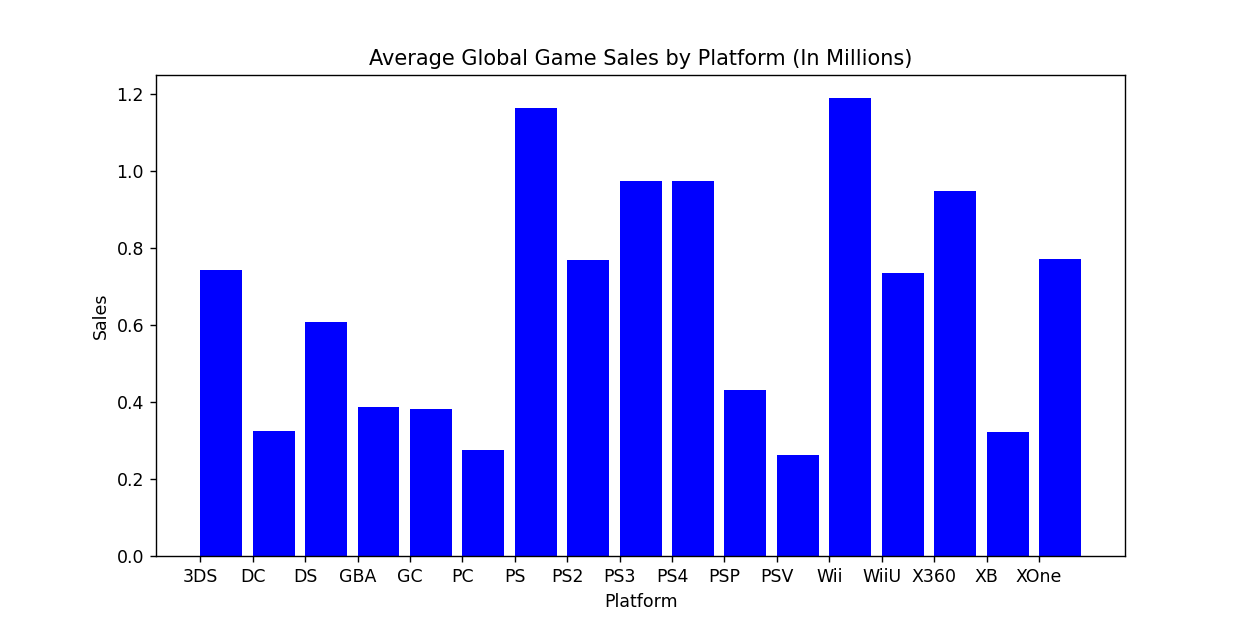

In [1]:
%matplotlib notebook

import pandas as pd
import matplotlib as mpl
import numpy as np
import ipywidgets as widgets
from IPython.core.display import display
#from ipywidgets import interact, interact_manual

videogame_database = pd.read_csv("Video_Games_Sales_as_at_22_Dec_2016.csv")

platform_dropdown_list = videogame_database["Platform"].unique().tolist()
genre_dropdown_list = videogame_database["Genre"].unique().tolist()

platform_dropdown_list.append("None")
genre_dropdown_list.append("None")

platform_dropdown = widgets.Dropdown(options=platform_dropdown_list, description="Platform:", value="None")
genre_dropdown = widgets.Dropdown(options=genre_dropdown_list, description="Genre:", value="None")

display(platform_dropdown)
display(genre_dropdown)

selected_platform = "None"
selected_genre = "None"

games_list = ["None"]

def platform_change(change):
    global selected_platform
    global games_list
    global games_dropdown

    selected_platform = change["new"]
    if (selected_platform != "None") and (selected_genre != "None"):
        games_list = videogame_database[(videogame_database["Platform"] == selected_platform) & (videogame_database["Genre"] == selected_genre)]
        games_list = games_list["Name"].tolist()
        games_list.sort()
        games_dropdown.options = games_list
    else:
        games_list = ["None"]


def genre_change(change):
    global selected_genre
    global games_list
    global games_dropdown

    selected_genre = change["new"]
    if (selected_platform != "None") and (selected_genre != "None"):
        games_list = videogame_database[(videogame_database["Platform"] == selected_platform) & (videogame_database["Genre"] == selected_genre)]
        games_list = games_list["Name"].tolist()
        games_list.sort()
        games_dropdown.options = games_list
    else:
        games_list = ["None"]


platform_dropdown.observe(platform_change, names = "value")
genre_dropdown.observe(genre_change, names = "value")

#mpl.pyplot.plot([[0,0],[1,1]], linewidth=4, label='random diagonal')
#mpl.pyplot.show()

platforms = videogame_database["Platform"].unique().tolist()
platforms.sort()

# Calculate the average global sales for each platform.
mean_global_sales = videogame_database.groupby("Platform")["Global_Sales"].mean()
sales = mean_global_sales.tolist()

fig = mpl.pyplot.figure(figsize = (10,5))

mpl.pyplot.bar(platforms, sales, color ='blue', align="edge")
mpl.pyplot.title("Average Global Game Sales by Platform (In Millions)")
mpl.pyplot.xlabel("Platform")
mpl.pyplot.ylabel("Sales")
mpl.pyplot.show()

Please select a game to buy from these categories:

In [2]:
def game_change(change):
    pass


games_dropdown = widgets.Dropdown(options=games_list, description="Game:", value="None")
display(games_dropdown)

Dropdown(description='Game:', options=('None',), value='None')